#            EXPLORATORY DATA ANALYSIS BY-POULAMI CHOUDHURY

<b><br>BATCH-B1</b>

<b>OBJECTIVE:-</b>
To underatand how the Student's performance(test scores) is affected by the other variables like Gender,Race/Ethnicity,Parental level of education,Lunch,Test Preparation Course.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
data=pd.read_csv('StudentsPerformance.csv')


In [3]:
#Checking the head of the data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Replacing the spaces in the column heading
data.columns=data.columns.str.replace(' ','_')

In [5]:
#checking the tail of the data
data.tail()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# Unique values in columns

In [6]:
#List of unique values in each column
data.nunique()

gender                          2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
data.gender.unique()

array(['female', 'male'], dtype=object)

In [8]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
data.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental_level_of_education    1000 non-null object
lunch                          1000 non-null object
test_preparation_course        1000 non-null object
math_score                     1000 non-null int64
reading_score                  1000 non-null int64
writing_score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Here,we see that:<br><b> Cateogorical variables</b> are:Gender,Race/Ethicity,Parental level of education,Lunch and Test Preparation Course.<br><b>Numerical Variables</b> are:Math Score,Reading Score and Writing Score

In [12]:
data.sort_values('gender').head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
563,female,group D,some college,free/reduced,completed,63,80,80
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
567,female,group D,master's degree,free/reduced,completed,61,71,78
572,female,group C,some college,standard,none,53,62,56


# Cleaning the data

In [13]:
#Checking for Null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

So,we can see there is no null value present in the given dataset.According to my observation the  parental level of education does not affect the peformance of the student in any manner so this informations won't be used further for analysing the performances.

In [14]:
#Checking for duplicate data
data.duplicated().sum()

0

There is no such duplicate data present.So we don't need to remove them.

In [15]:
#Dropping the unnecessary values in the dataset
data.drop(['parental_level_of_education'],axis=1).head()

,gender,race/ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75


The parental level of education doesn't seem to have any direct effect of student,s performance.So, dropping this column for further analysis.

# Detecting and removing outliers


In [16]:
#Description of the data
data.describe()
data.shape

(1000, 8)

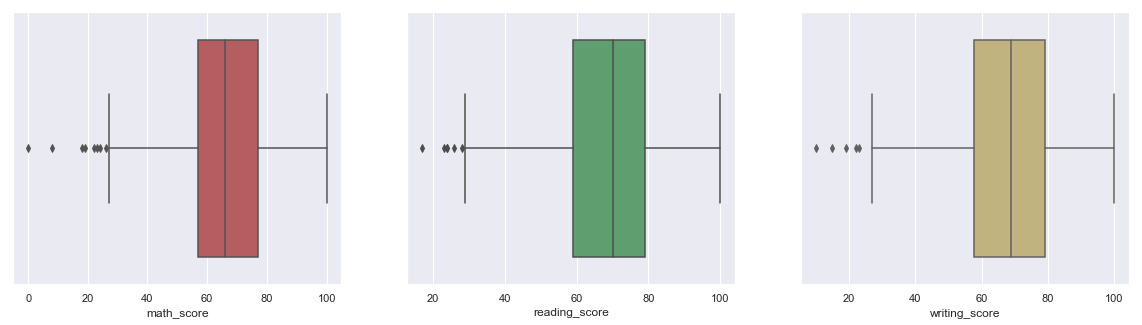

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data['math_score'],color='r')
plt.subplot(1,3,2)
sns.boxplot(data['reading_score'],color='g')
plt.subplot(1,3,3)
sns.boxplot(data['writing_score'],color='y')
plt.show()




So, here we can see there are some ponts which are different from other points.Some are very high and some are very low.So,to make our model
accurate we remove these outliers using IQR technique.

In [18]:
#Using IQR method to remove outliers

first_quartile=data.quantile(0.25)
third_quartile=data.quantile(0.75)
IQR=third_quartile-first_quartile
print(IQR)
Lower_bound=first_quartile-(1.5*IQR)
Upper_bound=third_quartile+(1.5*IQR)
print(Lower_bound,Upper_bound)

math_score       20.00
reading_score    20.00
writing_score    21.25
dtype: float64
math_score       27.000
reading_score    29.000
writing_score    25.875
dtype: float64 math_score       107.000
reading_score    109.000
writing_score    110.875
dtype: float64


In [19]:
data=data[~((data<Lower_bound)|(data>Upper_bound)).any(axis=1)]
#Shape of the data after removing the outliers
data.shape

(988, 8)

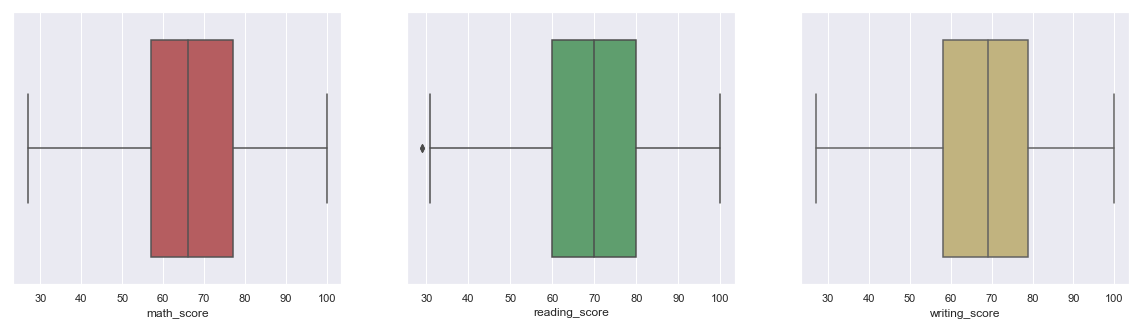

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data['math_score'],color='r')
plt.subplot(1,3,2)
sns.boxplot(data['reading_score'],color='g')
plt.subplot(1,3,3)
sns.boxplot(data['writing_score'],color='y')
plt.show()



So, almost all the outliers have been removed now.

# Data Visualization

In [21]:
#Creating dummy variables for gender to find a corelation between the gender,math score,reading score and writing score
data['gender_male']=data['gender'].map({'female':0,'male':1})
data['gender_female']=data['gender'].map({'female':1,'male':0})


data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_male,gender_female
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
1,female,group C,some college,standard,completed,69,90,88,0,1
2,female,group B,master's degree,standard,none,90,95,93,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0
4,male,group C,some college,standard,none,76,78,75,1,0


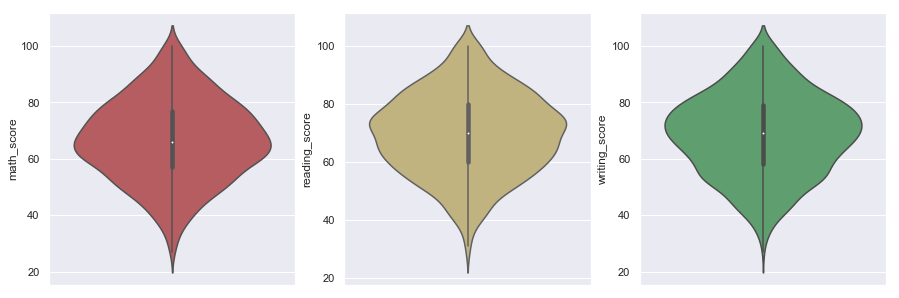

In [22]:
#The violin plots show range od scores obtained by the students
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.violinplot(y="math_score",data=data,color='r')
plt.subplot(1,3,2)
sns.violinplot(y="reading_score",data=data,color='y')
plt.subplot(1,3,3)
sns.violinplot(y="writing_score",data=data,color='g')
plt.show()

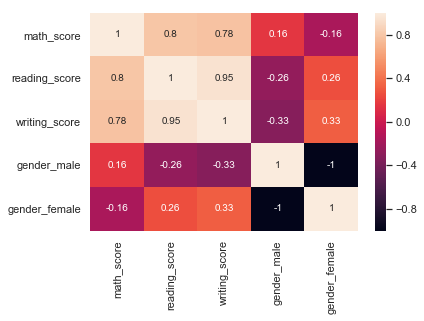

In [23]:
#A heatmap showing correlation in the data
corelation=data.corr()

sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [24]:
data.drop(['gender_male','gender_female'],axis=1,inplace=True)
data.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


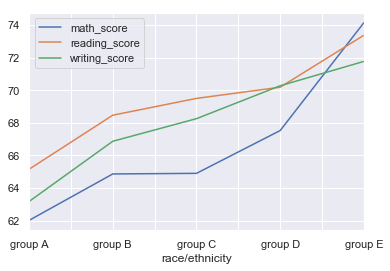

In [25]:
#Comparison of Performace of students in maths,reading and writing ,belonging to different ethnic groups
%matplotlib inline
data.groupby('race/ethnicity').mean().plot(kind='line')

So,from the above line chart we can say that students belonging to race E have better average score in all three maths,reading as well as writing. 

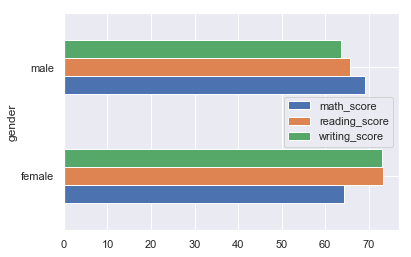

In [26]:
#Comparison betrween performance of male and female in Maths,reading and writing
%matplotlib inline
data.groupby('gender').mean().plot(kind='barh') 

So,we can see from the above bar graph that :-
<br>1) Average  performance of female students are better than the male students in reading and writing,
   where as male students have higher average score in maths than female students.
<br>2) Reading and writing skills in female are better than thei skills in maths in an average.
<br>3) Male students are having better maths solving skills and reading skills than writing skills,in an average.


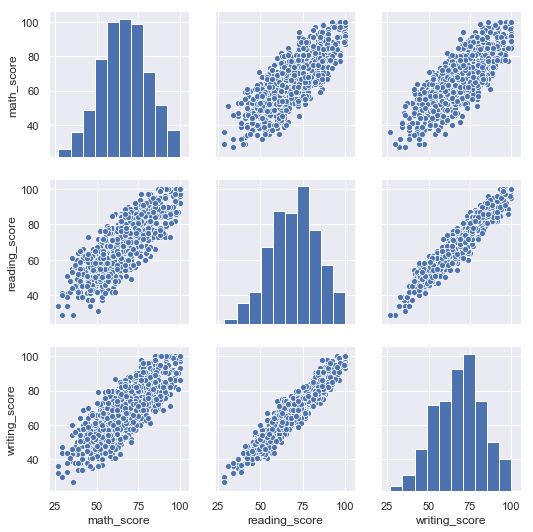

In [27]:
#Now we use a pair plot to vizualize the pattern in the relationship between all the integer values present in the data
sns.pairplot(data)

The above pairplot doesn't give a much clear idea. So, using a relplot for a better observation 

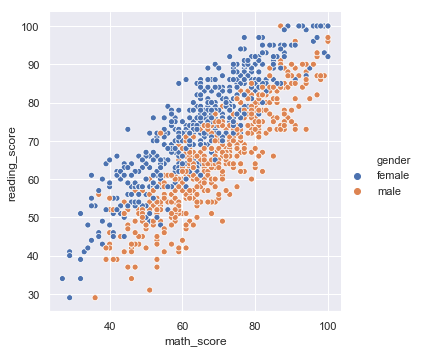

In [28]:
#Analyzing realtionship between two variables using relplots
sns.relplot(x='math_score',y='reading_score',hue='gender',data=data)


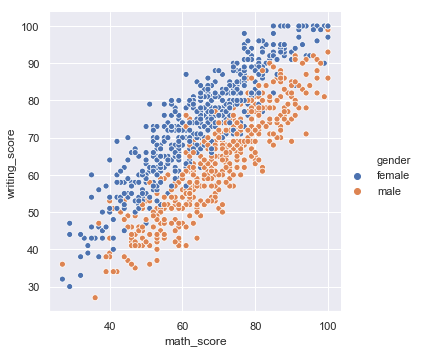

In [29]:
sns.relplot(x='math_score',y='writing_score',hue='gender',data=data)

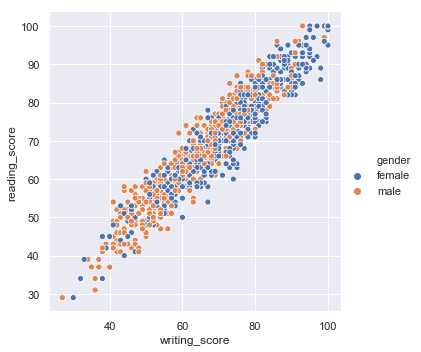

In [30]:
sns.relplot(x='writing_score',y='reading_score',hue='gender',data=data)

So, we can see all the scatter plots are increasing.

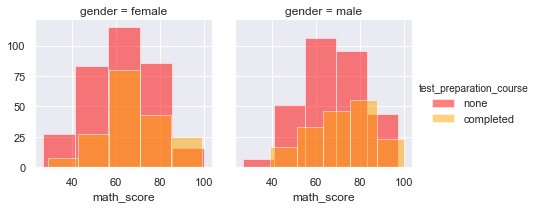

In [31]:
#Maximum score in maths achieved by both male and female students with and without test preparations.
pal = dict(none="red", completed="orange")
a=sns.FacetGrid(data,col='gender',hue='test_preparation_course',palette=pal)
a.map(plt.hist,'math_score',bins=5,alpha=0.5)
a.add_legend()


From the above graph we can see most female with training have scores around 80 where as most male with training 
have score around 70 in maths.

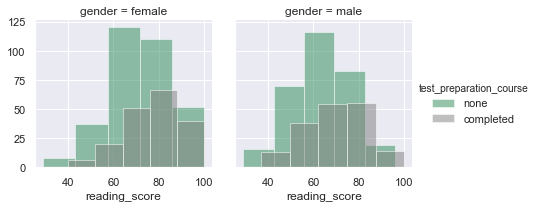

In [32]:
#Maximum score in reading achieved by both male and female students with and without test preparations.
pal = dict(none="seagreen", completed="gray")
a=sns.FacetGrid(data,col='gender',hue='test_preparation_course',palette=pal)
a.map(plt.hist,'reading_score',bins=5,alpha=0.5)
a.add_legend()

From the above graph we can see most female with training have scores around 80 where as most male with training 
have score around 70 in reading.

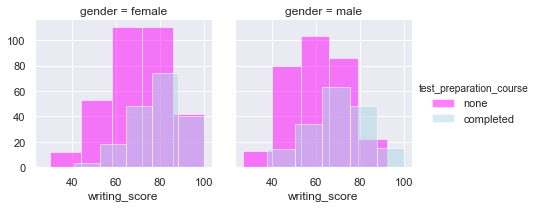

In [33]:
#Maximum score in reading achieved by both male and female students with and without test preparations.
pal = dict(none="magenta", completed="lightblue")
a=sns.FacetGrid(data,col='gender',hue='test_preparation_course',palette=pal)
a.map(plt.hist,'writing_score',bins=5,alpha=0.5)
a.add_legend()

From the above graph we can see most female with training have scores around 80 where as most male with training 
have score around 60 in writing.

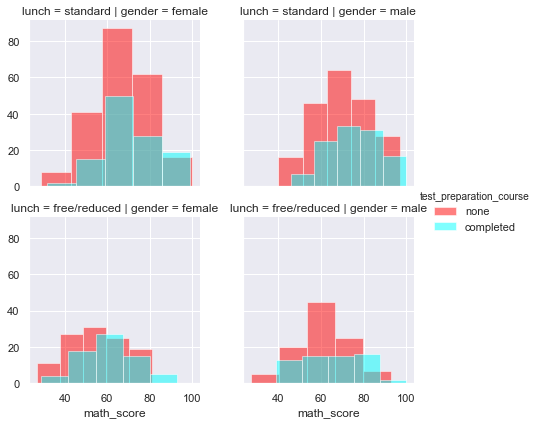

In [34]:
#Marks obtained by male and female according to variations in lunch
pal = dict(none="red", completed="cyan")
a=sns.FacetGrid(data,col='gender',row='lunch',hue='test_preparation_course',palette=pal)
a.map(plt.hist,'math_score',bins=5,alpha=0.5)
a.add_legend()

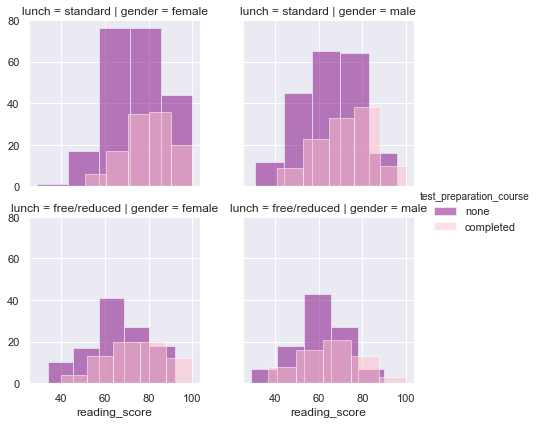

In [35]:
pal = dict(none="purple", completed="pink")
a=sns.FacetGrid(data,col='gender',row='lunch',hue='test_preparation_course',palette=pal)
a.map(plt.hist,'reading_score',bins=5,alpha=0.5)
a.add_legend()

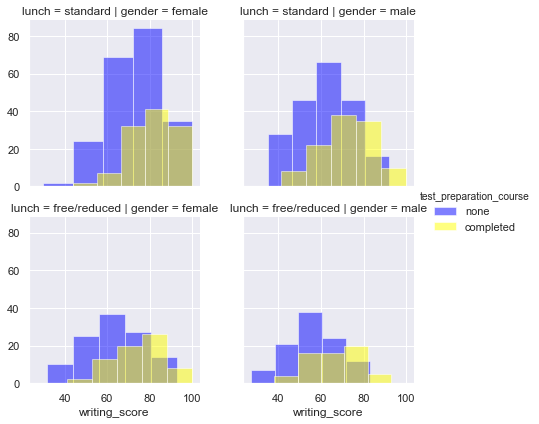

In [36]:
pal = dict(none="blue", completed="yellow")
a=sns.FacetGrid(data,col='gender',row='lunch',hue='test_preparation_course',palette=pal)
a.map(plt.hist,'writing_score',bins=5,alpha=0.5)
a.add_legend()

So,from the above graphs its clear that
<br>1>students having standered lunch show a better performance in all three subjects.
<br>2>students having completed their preperations also show a better average performance than those who have no prereration.

<b>Now,analyzing the average performace of the male and female students.</b>

In [37]:
data['total_marks']=data['math_score'] + data['reading_score'] + data['writing_score']
data['percentage']=data['total_marks']/3


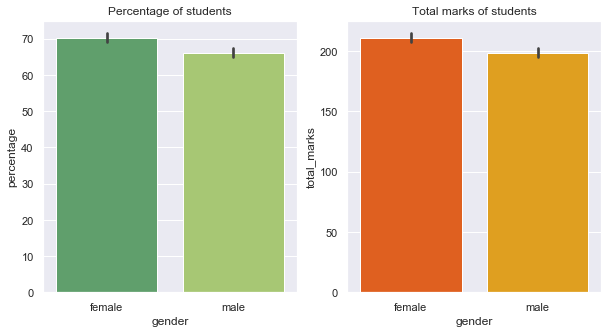

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Percentage of students')
sns.barplot(x='gender',y='percentage',data=data,palette="summer")
plt.subplot(1,2,2)
plt.title('Total marks of students')
sns.barplot(x='gender',y='total_marks',data=data,palette="autumn")

plt.show()

So, from the bar plot its clear that female students have a better performace in total and have scored a better percentage than the male students.